In [1]:
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import time
import pandas as pd

## (1) 請任選 Cupoy 新聞服務之某一種分類 (如熱門新聞、科技、商業....)，使用你學習過的爬蟲程式，爬取前 500 篇的文章：

In [2]:
URL = r"https://www.cupoy.com/newsfeed/topstory"

In [ ]:
#靜態抓法完全抓不到，網站需要一點時間request
r = requests.get(URL)
soup = BeautifulSoup(r.text, "html.parser")
soup

In [ ]:
title_list = []

browser = webdriver.Chrome(executable_path=r'C:\Users\user\Dropbox\23 - Python\Program\chromedriver.exe')
browser.get(URL)
time.sleep(5)

html_source = browser.page_source
soup = BeautifulSoup(html_source, "html.parser")

result = soup.find_all("div", class_="sc-bIqbHp sc-ghsgMZ fnbqBs") 
for tag in result:
    title_list.append(tag.find('h6').text)

title_list = list(set(title_list))
title_list 

In [22]:
# 動態網站抓法
title_list = []

browser = webdriver.Chrome(executable_path=r'C:\Users\user\Dropbox\23 - Python\Program\chromedriver.exe')
browser.get(URL)
    
# 每隔兩秒鐘自動往下滑
for i in range(100):
    time.sleep(2)    
    if i != 0:
        browser.execute_script("window.scrollTo(0, document.body.clientHeight);")
    
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html.parser")
    result = soup.find_all("div", class_="sc-bIqbHp sc-ghsgMZ fnbqBs") 
    for tag in result:
        title_list.append(tag.find('h6').text)
        
    title_list = list(set(title_list))
    if len(title_list) >= 500:
        break
print('No. of titles is', len(title_list)) 
print(title_list)        

C:\Users\user\AppData\Local\Temp/ipykernel_13780/2531917181.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path=r'C:\Users\user\Dropbox\23 - Python\Program\chromedriver.exe')


No. of titles is 507
['春末賞櫻最後倒數！北投捷運沿線「夢幻粉紅祕境」\u3000富士櫻滿開超好拍 -- 上報 / 生活', 'Windows 11、Windows 10 更新先緩緩，最新版本爆 Chrome、Edge 無法使用災情 - 電腦王阿達', '【臺獨教父逝】彭明敏一輩子愛臺灣\u3000絕筆：一中一臺早已是鐵一般事實 -- 上報 / 焦點', '快篩試劑太貴的真相？醫學生質疑「研究快篩成果被收割」，慈濟大學回應了-風傳媒', '本土+744例，指揮中心籲長者及洗腎病人打疫苗、國人開發「清冠一號」證實有效抗病毒 - The News Lens 關鍵評論網', '當品牌商達到RE100目標，然後呢？Apple是否能成為觸發漣漪的「第一顆小石頭」？', '虛擬資產成熱潮，NFT交易屢創天價！專家提醒：即使是數位作品的收藏者，也不等於擁有著作權-財經好讀-觀點新聞-商周財富網', '美政府對俄制裁，電信及線上服務得以豁免 | iThome', 'Netflix 新增雙 Like 選項  讓觀眾反映對內容的喜愛程度 - 香港 unwire.hk', '手上有第一桶金，該立刻買房還是拿去投資？過來人列6點考量，一比較就知道答案了！-風傳媒', '艾力康8位數重金邀請「林志穎、林心如、侯佩岑」代言科技燕窩第一品牌！ | 艾力康、林志穎、林心如、侯佩岑、科技燕窩 | 品牌新聞 | 妞新聞 niusnews', '印度神童再度預言成功！曾點名臺灣要小心、關鍵2事件讓網友直呼「準到不合邏輯」-風傳媒', '手機對中這三碼送龍蝦！王品夏慕尼 4 月份愛的密語活動最後倒數\u3000母親節加碼撩媽菜色免費招待 -- 上報 / 生活', '《控告婚姻》推薦文：婚姻中的父權文化一天不結束，我就會勸未婚的朋友務必與婚姻保持距離 - 第 1 頁 - The News Lens 關鍵評論網', '【國內新訊】中華汽車宣佈2022年度品計劃，導入MG品牌國產與鴻華電動車、Lancer將走入歷史！', '俄軍遭控在烏克蘭犯下數百起性侵，且加大力度進攻東南部戰略要地馬裏烏波爾 - The News Lens 關鍵評論網', 'Sony互動娛樂官網更新藏彩蛋，下一個要收購的是小島秀夫的工作室？ | T客邦', '買房附贈的標配總是烘碗機？他不解「為何不送洗碗機」，內行人曝建

## (2) 存成DataFrame

In [26]:
df = pd.DataFrame(title_list, columns = ['Title'])
df.to_csv(r"C:\Users\user\Dropbox\23 - Python\Program\Courses\PyCrawlerMarathon\D37 - 撰寫爬蟲程式搜集指定動態網站與靜態網頁的資料\title_list.csv",
          encoding="utf-8-sig", index = False)

In [2]:
df = pd.read_csv(r"C:\Users\user\Dropbox\23 - Python\Program\Courses\PyCrawlerMarathon\D37 - 撰寫爬蟲程式搜集指定動態網站與靜態網頁的資料\title_list.csv")

## (3) 用jieba斷詞，簡單計算文字出現頻率
* 將經常出現的stop words過濾掉後計算頻率

In [ ]:
! pip install jieba

In [22]:
# 設定停用詞
stopwords_path = r'C:\Users\user\Dropbox\23 - Python\Program\Courses\PyCrawlerMarathon\D37 - 撰寫爬蟲程式搜集指定動態網站與靜態網頁的資料\stopwords1893.txt'

stopwords = []
with open(stopwords_path, 'r', encoding='utf-8') as f:
    for line in f:
        if len(line)>0:
            stopwords.append(line.strip())
stopwords.append(' ') #增加一元素，空格
stopwords

['',
 '，',
 '「',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '.數',
 '.日',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”。',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '',
 '、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '》）。',
 '」',
 '『',
 '』',
 '【',
 '】',
 '〔',
 '〕',
 '〕〔',
 '㈧',
 '一',
 '一.',
 '一一',
 '一下',
 '一個',
 '一些',
 '一何',
 '一切',
 '一則',
 '一則通過',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一時',
 '一來',
 '一樣',
 '一次',
 '一片',
 '一番',
 '一直',
 '一致',
 '一般',
 '一

In [25]:
import jieba
from collections import Counter

title_list = df['Title'].tolist()

title_list2 = []
for item in title_list:
    cut = list(jieba.cut(item))
    # jieba.cut  回傳 generator，要用for loop 取值
    # jieba.lcut 回傳 list，可直接取用
#     print(item_jieba)
#     break
    for word in cut:
        if word not in stopwords:
            title_list2.append(word)
counter = Counter(title_list2)
counter.most_common() #照出現頻率最多開始排序

[('臺', 87),
 ('News', 76),
 ('風傳媒', 72),
 ('The', 70),
 ('關鍵', 70),
 ('\u3000', 69),
 ('Lens', 66),
 ('評論網', 66),
 ('上報', 47),
 ('ETtoday', 34),
 ('雲', 34),
 ('數位', 31),
 ('新聞', 29),
 ('時代', 27),
 ('BusinessNext', 25),
 ('T', 23),
 ('iThome', 22),
 ('客邦', 22),
 ('月', 22),
 ('頁', 21),
 ('Taiwan', 21),
 ('媒體', 21),
 ('貨幣', 21),
 ('佈', 20),
 ('2022', 20),
 ('年', 20),
 ('比特', 20),
 ('加密', 20),
 ('科技', 19),
 ('區塊', 19),
 ('商周', 18),
 ('幣', 18),
 ('旅遊', 18),
 ('生活', 17),
 ('焦點', 17),
 ('鏈', 17),
 ('灣', 16),
 ('香港', 16),
 ('推出', 16),
 ('影響力', 15),
 ('長', 15),
 ('Cool3c', 15),
 ('動區動', 14),
 ('趨', 14),
 ('最具', 14),
 ('機器', 14),
 ('妞新聞', 13),
 ('niusnews', 13),
 ('推薦', 13),
 ('說', 13),
 ('10', 12),
 ('品牌', 12),
 ('專家', 12),
 ('免費', 12),
 ('Vogue', 12),
 ('億', 12),
 ('美元', 12),
 ('之心', 12),
 ('元', 12),
 ('祕', 11),
 ('電腦', 11),
 ('Android', 11),
 ('國際', 11),
 ('馬', 11),
 ('流動', 11),
 ('日報', 11),
 ('財富網', 10),
 ('unwire', 10),
 ('hk', 10),
 ('新訊', 10),
 ('烏克蘭', 10),
 ('Google', 10),
 ('中國', 10),
 

## (5) 用word 文字雲呈現

In [26]:
!pip install wordcloud

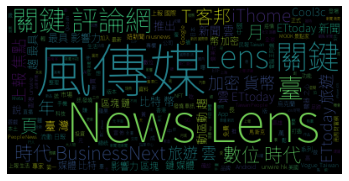

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

font_path = r"C:\Users\user\Dropbox\23 - Python\Program\Courses\PyCrawlerMarathon\D37 - 撰寫爬蟲程式搜集指定動態網站與靜態網頁的資料\SourceHanSansHC-VF.otf"
seg_list =' '.join(title_list2)

wc = WordCloud(background_color='black', font_path=font_path)
wc.generate(seg_list)
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
plt.show()